In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
root_dir='/content/gdrive/My Drive/mediapipe/project'

Mounted at /content/gdrive


# Specify each path

In [3]:
dataset = root_dir + '/model/keypoint_classifier/keypoint.csv'
model_save_path = root_dir + '/model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = root_dir + '/model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [4]:
NUM_CLASSES = 24

# Dataset reading

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 24)                264       
                                                                 
Total params: 1334 (5.21 KB)
Trainable params: 1334 (5.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(model_save_path, verbose=1, save_weights_only=False)

In [11]:

# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [12]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [13]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
44/44 [==============================] - ETA: 0s - loss: 3.1857 - accuracy: 0.0595
Epoch 1: saving model to /content/gdrive/My Drive/mediapipe/project/model/keypoint_classifier/keypoint_classifier.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


44/44 [==============================] - 9s 26ms/step - loss: 3.1857 - accuracy: 0.0595 - val_loss: 3.1248 - val_accuracy: 0.1044
Epoch 2/1000
44/44 [==============================] - ETA: 0s - loss: 3.0976 - accuracy: 0.0961
Epoch 2: saving model to /content/gdrive/My Drive/mediapipe/project/model/keypoint_classifier/keypoint_classifier.hdf5
44/44 [==============================] - 0s 10ms/step - loss: 3.0976 - accuracy: 0.0961 - val_loss: 3.0283 - val_accuracy: 0.1885
Epoch 3/1000
43/44 [============================>.] - ETA: 0s - loss: 3.0007 - accuracy: 0.1357
Epoch 3: saving model to /content/gdrive/My Drive/mediapipe/project/model/keypoint_classifier/keypoint_classifier.hdf5
44/44 [==============================] - 0s 9ms/step - loss: 2.9987 - accuracy: 0.1374 - val_loss: 2.8778 - val_accuracy: 0.1901
Epoch 4/1000
42/44 [===========================>..] - ETA: 0s - loss: 2.8473 - accuracy: 0.1823
Epoch 4: saving model to /content/gdrive/My Drive/mediapipe/project/model/keypoint_cl

In [14]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

15/15 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.8672


In [15]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [16]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 91ms/step
[1.9662710e-02 4.2211036e-03 7.6729029e-02 3.2927971e-07 4.4515957e-05
 1.1429581e-02 5.4407177e-05 3.9224639e-03 7.3076278e-01 3.6443967e-02
 9.0488099e-04 2.7870152e-02 2.7088240e-07 6.4539519e-04 4.2116787e-02
 3.1067384e-03 3.6126759e-09 1.8626602e-05 1.4435346e-02 2.5183929e-06
 2.4870381e-04 3.9026637e-07 2.7379310e-02 9.7554942e-12]
8


# Confusion matrix

59/59 [==============================] - 0s 2ms/step


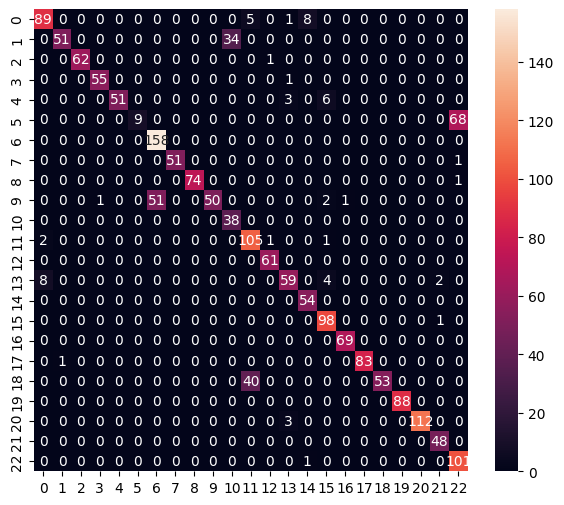

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       103
           1       0.98      0.60      0.74        85
           2       1.00      0.98      0.99        63
           3       0.98      0.98      0.98        56
           4       1.00      0.85      0.92        60
           5       1.00      0.12      0.21        77
           6       0.76      1.00      0.86       158
           7       1.00      0.98      0.99        52
           8       1.00      0.99      0.99        75
           9       1.00      0.48      0.65       105
          10       0.53      1.00      0.69        38
          11       0.70      0.96      0.81       109
          12       0.97      1.00      0.98        61
          13       0.88      0.81      0.84        73
          14       0.86      1.00      0.92        54
          15       0.88      0.99      0.93        99
          16       0.99      1.00      0.99        69
     

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [18]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

7424

# Inference test

In [20]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [21]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [22]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [23]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 60 µs, sys: 0 ns, total: 60 µs
Wall time: 64.4 µs


In [24]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.9662701e-02 4.2211064e-03 7.6729029e-02 3.2928034e-07 4.4515997e-05
 1.1429575e-02 5.4407272e-05 3.9224681e-03 7.3076278e-01 3.6444012e-02
 9.0488058e-04 2.7870135e-02 2.7088393e-07 6.4539508e-04 4.2116776e-02
 3.1067424e-03 3.6126970e-09 1.8626637e-05 1.4435325e-02 2.5183951e-06
 2.4870408e-04 3.9026631e-07 2.7379282e-02 9.7554942e-12]
8
